# Segmentação de imagem por K-Means e DBSCAN

In [1]:
import numpy
import cv2 as openCV
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as pyplot
from IPython.display import Image, Markdown, display

Ler e mostrar imagem original. OpenCV usa BGR por padrão.

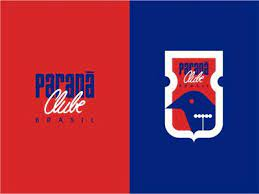

In [2]:
imagem_original = openCV.imread("imagens/parana_clube.jpg")
Image("imagens/parana_clube.jpg")

Vetorizar a imagem e transformar de uint8 para float32

In [13]:
vetor_imagem = imagem_original.reshape((-1, 3))
vetor_imagem = numpy.float32(vetor_imagem)
display(Markdown(f'*Imagem Original:*<br/>&emsp;Forma:{imagem_original.shape}<br/>&emsp;Tamanho:{imagem_original.size}<br/>&emsp;Tamanho primeiro ponto:{imagem_original[0,0]}'))
display(Markdown(f'*Vetor Imagem:*<br/>&emsp;Forma:{vetor_imagem.shape}<br/>&emsp;Tamanho:{vetor_imagem.size}<br/>&emsp;Tamanho primeiro elemento:{vetor_imagem[0]}'))

*Imagem Original:*<br/>&emsp;Forma:(194, 259, 3)<br/>&emsp;Tamanho:150738<br/>&emsp;Tamanho primeiro ponto:[125 134 255]

*Vetor Imagem:*<br/>&emsp;Forma:(50246, 3)<br/>&emsp;Tamanho:150738<br/>&emsp;Tamanho primeiro elemento:[125. 134. 255.]

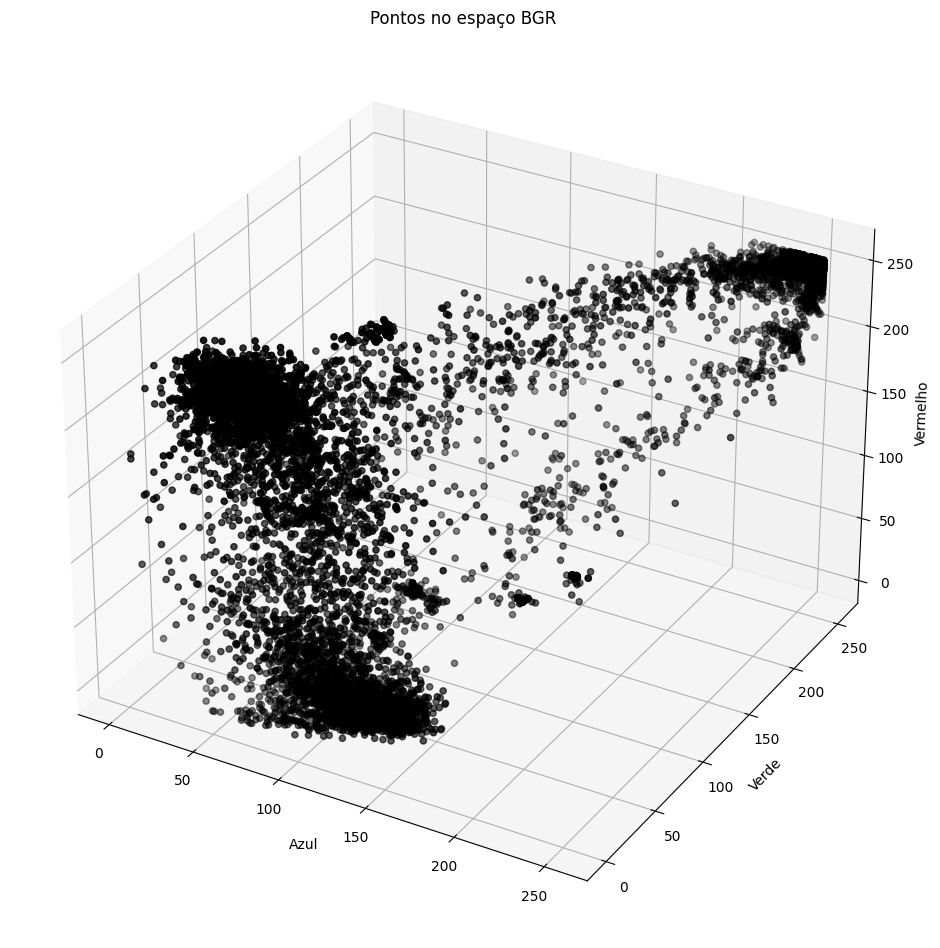

In [16]:
azul = vetor_imagem[:, 0]
verde = vetor_imagem[:, 1]
vermelho = vetor_imagem[:, 2]
figura = pyplot.figure()
grafico = figura.add_subplot(projection='3d')
grafico.set_title("Pontos no espaço BGR")
grafico.set_xlabel('Azul')
grafico.set_ylabel('Verde')
grafico.set_zlabel('Vermelho')
grafico.scatter(azul, verde, vermelho, color="#000000")
pyplot.rcParams['figure.figsize'] = [18, 12]
pyplot.rcParams['figure.dpi'] = 100
pyplot.show()

# K-Means
Definir parametros e rodar K-means<br/>
*Observação:*<br/>
&emsp;medida_de_compactacao = ∑i(AMOSTRAi−CENTROIDEi)² [Referência](https://docs.opencv.org/master/d5/d38/group__core__cluster.html#ga9a34dc06c6ec9460e90860f15bcd2f88)

In [18]:
numero_de_clusters = 2
criterios = (
    openCV.TermCriteria_EPS + openCV.TermCriteria_MAX_ITER,
    10,
    0.5
)
tentativas = 10
medida_de_compactacao, categorias, centroides = openCV.kmeans(
    vetor_imagem,
    numero_de_clusters,
    None,
    criterios,
    10,
    openCV.KMEANS_RANDOM_CENTERS
)

display(centroides)

array([[ 60.483315,  57.159428, 214.11227 ],
       [123.51751 ,  35.434982,   8.579813]], dtype=float32)

In [19]:
centroides = numpy.uint8(centroides)
vetores_segmentados_por_kmeans = centroides[categorias.flatten()]
imagem_segmentada_por_kmeans = vetores_segmentados_por_kmeans.reshape((imagem_original.shape))

In [20]:
openCV.imshow('Imagem Segmentada', imagem_segmentada_por_kmeans)
openCV.waitKey(0)
openCV.destroyAllWindows()

# DBSCAN
Definir parametros episolon e minimo de amostras e rodar dbscan

In [22]:
epsilon = 10
numero_minimo_de_amostras = 1000
dbscan = DBSCAN(eps=epsilon, min_samples=numero_minimo_de_amostras)
dbscan.fit(vetor_imagem)
categorias_dbscan = dbscan.labels_
numero_de_clusters = len(set(categorias_dbscan)) - (1 if -1 in categorias_dbscan else 0)
numero_de_ruidos = list(categorias_dbscan).count(-1)

display(numero_de_clusters)
display(numero_de_ruidos)

3

6426

In [23]:
imagem_ruido_x_categorizado = numpy.uint8(categorias_dbscan.reshape(imagem_original.shape[:2]))
openCV.imshow('Imagem Segmentada', imagem_ruido_x_categorizado)
openCV.waitKey(0)
openCV.destroyAllWindows()


## Referências
&emsp;Scikit Learn - Clustering: https://scikit-learn.org/stable/modules/clustering.html <br/>
&emsp;5 exemplos usando diferentes métodos: https://experiencor.github.io/segmentation.html <br/>